## A step forward for discovering knowledge using unsupervised learning
#### Authors: Ahmad Opeyemi ZUBAIR, Sara IZADI, Tiwalade OYEBODE, Al-Mu'tez Billah AL-SQOUR

### 1. Objective

Discuss different techniques for unsupervised learning and will focus on
several clustering techniques.

-   Consider basic concepts like distance and similarity, taxonomy
    of clustering techniques and goodness of clustering quality.
-   Explore three basic clustering techniques, namely, K-means,
    spectral clustering and hierarchical clustering.
-   Illustrate the use of clustering techniques on a real problem:
    defining groups of countries according to their economic expenditure
    on education.

### 2. Clustering

Partition unlabeled examples into disjoint subsets of clusters, such
that:

-   Examples within a cluster are similar (high intra-class similarity).
-   Examples in different clusters are different (low
    inter-class similarity).
-   It can help in discovering new categories in an unsupervised manner
    (no sample category labels provided).

Clustering will help us to analyse and get insight of the data, but
the quality of the partition depends on the application and the analyst.

#### 2.1 Similarity and distance

The notion of similarity is a tough one, however we can use the notion  
of distance as a surrogate. The most well-known instantiations of this
metric are:

-   Euclidean distance.
-   Manhattan distance.
-   Max-distance.

#### 2.2 What is a good clustering?

The ***Rand index*** or ***Rand measure*** (named after William M. Rand)
is a measure of the similarity between two data clusterings. A form of
the Rand index may be defined that is adjusted for the chance grouping
of elements, this is the  ***adjusted Rand index***. From a mathematical
standpoint, Rand index is related to the accuracy, but is applicable
even when class labels are not used.

Given a set of n elements :math:S = {o1, …, on} and two partitions of S
to compare, X = {X1, …, Xr}, a partition of S into r subsets, and Y =
{Y1, …, Ys}, a partition of S into s subsets. <span
style="font-size: 1rem;">Let us use the annotations as follows:</span>

-   a, the number of pairs of elements in S that are in the same set in
    X and in the same set in Y
-   b, the number of pairs of elements in S that are in different sets
    in X and in different sets in Y
-   c, the number of pairs of elements in S that are in the same set in
    X and in different sets in Y
-   d, the number of pairs of elements in S that are in different sets
    in X and in the same set in Y.

The **Rand index**, R is:

![Rand index](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/10/Capture-d’écran-2018-10-17-à-13.30.51.png)

The **adjusted** Rand index, AR is:

![Adjusted Rand index](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/10/Capture-d’écran-2018-10-17-à-13.33.03.png)

A clustering result satisfies *homogeneity* if all of its
clusters contain only data points which are members of the same original
(a single) class.

A clustering result satisfies *completeness* if all the data points that
are members of a given class are elements of the same automatic cluster.

Both scores have positive values between 0.0 and 1.0, larger
values being desirable.

In [1]:
import matplotlib.pylab as plt
from sklearn import metrics

metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))
print (metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

1.000
1.000
0.000
0.000
1.0
1.0
0.9999999999999999
0.0
0.0


***V-measure***  is the harmonic mean between homogeneity and
completeness:

    v = 2 \* (homogeneity \* completeness) / (homogeneity +
completeness)

Note that this metric is not dependent of the absolute values of the
labels: a permutation of the class or cluster label values will not
change the score value in any way. Moreover, the metric is symmetric
with respect to switching between the predicted and the original cluster
label.

This can be useful to measure the agreement of two independent
label assignments strategies on the same dataset when the real ground
truth is not known. If class members are completely split across
different clusters, the assignment is totally incomplete, hence the
V-measure is null.

Perfect labelings are both homogeneous and complete, hence have
score 1.0:

In [2]:
print (metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))
print (metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0
1.0


### Question 1. 
Labelings that assign all classes members to the same clusters are: ___________, but not _____________:

**Answer**: Such labellings are **complete** but not **homogenous**

In [3]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))
print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))
print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))
print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))
print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.000
0.000
0.000
0.800
0.667


### Question 2. 
Labelings that have pure clusters with members coming from the same classes are ________________ but un-necessary splits harm ____________________ and thus penalise V-measure as well:

**Answer**: Such labellings are **homogenous** but un-necessary splits harm **completeness** and penalise V-measure as well. 

In [4]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800
0.667


If classes members are completely split across different clusters, the assignment is totally incomplete, hence the V-Measure is null:

In [5]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000


### Question 3. 
Clusters that include samples from totally different classes totally destroy the _______________________  of the labelling, hence:

**Answer**: ..totally destroy the **homogeneity** of the labelling. Hence, the V-measure also suffers. 

In [6]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


#### Advantages

-   Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.
-   Intuitive interpretation: clustering with bad V-measure can
    be qualitatively analyzed in terms of homogeneity and completeness
    to better feel what ‘kind’ of mistakes is done by the assignment.
-   No assumption is made on the cluster structure: can be used
    to compare clustering algorithms such as K-means which assumes
    isotropic blob shapes with results of spectral clustering algorithms
    which can find cluster with “folded” shapes.

##### Drawbacks

-   The previously introduced metrics are *not normalised with
    regards to random labelling.* This means that depending on the
    number of samples, clusters and ground truth classes, a completely
    random labelling will not always yield the same values for
    homogeneity, completeness and hence V-measure. In particular random
    labelling will not yield zero scores especially when the number of
    clusters is large.
-   This problem can safely be ignored when *the number of
    samples* is high i.e. more than a thousand and the number of
    clusters is less than 10.
-   These metrics require the *knowledge of the ground truth classe*s
     while almost never available in practice or require manual
    assignment by human annotators (as in the supervised learning
    setting).

And if we do not have ground truth?

The ***Silhouette Coefficient*** is calculated using the
*mean intra-cluster distance* (a) and the *mean nearest-cluster
distance* (b) for each sample. The ***Silhouette Coefficient*** for a
sample is:

![Silhouette Coefficient](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/10/Capture-d’écran-2018-10-17-à-13.43.37.png)

where b is the distance between a sample and the nearest cluster
that the sample is not part of.

-   If the Silhouette s(i) is close to 0, it means that the sample is on
    the border of its cluster and the closest one from the rest of the
    dataset clusters.
-   A negative value means that the sample is closer to the neighbor
    cluster.
-   The average of the Silhouette coefficients of all samples of a given
    cluster defines the “goodness” of the cluster.
-   The ***average of the Silhouette*** coefficients of all clusters
    gives idea of the quality of the clustering result.

Note that the Silhouette coefficient only makes sense when the number of
labels predicted is less than the number of samples clustered.

-   <span style="color: #000000;">The score is bounded between -1 and
    +1. </span>
-   <span style="color: #000000;">The score is higher when clusters are
    dense and well separated, which</span>  
    <span style="color: #000000;">relates to a standard concept of a
    cluster.</span>

### 2.3 Clustering techniques: how to group samples?

There are two big families of clustering techniques:

-   Partitional algorithms: Start with a random partition and refine it
    iteratively.
-   Hierarchical algorithms: Agglomerative (bottom-up), top-down.
-   Partitional algorithms. <span style="font-size: 1rem;">They can be
    divided in two branches:</span>
    -   Hard partition algorithms, such as ***K-means***, assign a
        unique cluster value to each element in the feature space.
    -   Soft partition algorithms, such as ***Mixture of Gaussians***,
        can be viewed as density estimators and assign a confidence or
        probability to each point in the space.

In order to build our intuition about clustering, we will start with
the simplest, but one of the most famous methods: **K-means**.

#### 2.3.1 K-means algorithm

##### Algorithm:

1.  Initialise the value K of desirable clusters.
2.  Initialise the K cluster centres, e.g. randomly.
3.  Decide the class memberships of the N data samples by assigning them
    to the  
    nearest cluster centroids (e.g. the center of gravity or mean).
4.  Re-estimate the K cluster centres, by assuming the memberships found
    above are correct.
5.  If none of the N objects changed membership in the last iteration,
    exit. Otherwise go to 3.

Let us see this in action:


In [7]:
import numpy as np

#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)])
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

KMeans(init='random', n_clusters=3)

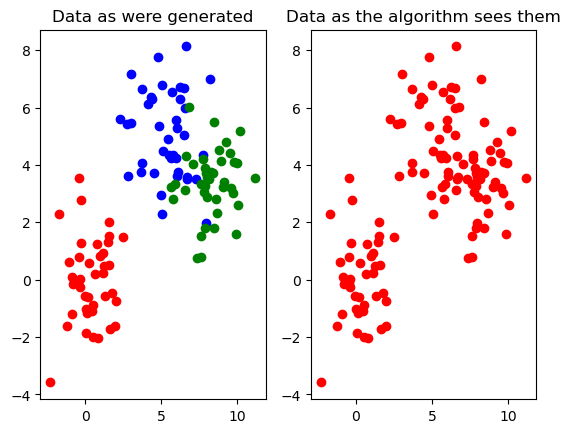

In [8]:
#Just for visualization purposes, create the labels of the 3 distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees them')

from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

Each clustering algorithm comes in two variants:

-   a class, that implements the *fit* method to learn the clusters on
    train data,
-   a *predict* function, that, given test data, returns an array of
    integer labels corresponding to the different clusters.

For the class, the labels over the training data can be found in the
labels attribute.

In [9]:
print (clf.labels_) # or
print (clf.predict(X)) # equivalent

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2]


In [10]:
print (X[(y==1).ravel(),0]) #numpy.ravel() returns a flattened array
print (X[(y==1).ravel(),1])

[-0.48303578  1.48059302  2.4894126   1.24597666  0.13258987  1.15506128
  1.53136608  1.76213313  1.97061832 -1.71339119 -0.29089552  0.25645609
  0.01537769 -0.36037768 -0.04056768 -0.90514361 -0.36758534  0.66649239
 -0.43553633 -2.29323014  0.96404157  1.53324038 -1.07027512 -1.22373371
 -0.42295352  0.4357573   0.06002515 -0.80918351  0.17526937  0.8222819
  1.58172757  1.1345471   0.52380809  0.74629476 -0.84976731  0.53632168
  2.01343775 -0.2835125   1.30739895  1.6267245 ]
[-0.11351509  1.324974    1.49582543  0.47392575 -1.17721563  0.24018976
  1.52313355 -0.46792961 -1.60528596  2.3034379   1.26755735  0.57067924
 -1.03741696 -0.23855582 -0.58172169 -1.20596125  0.02571349  0.202592
  0.80206938 -3.58438773  0.84142949  2.00974185  0.62405068 -1.6062183
  3.55098874 -1.1087912  -1.86642587 -0.15263493 -0.61070864 -2.03502352
  0.50006603  0.94401003 -2.000826    1.24176021  0.10437251 -0.88175144
 -0.74363696  2.78799597 -0.56778312 -1.71059308]


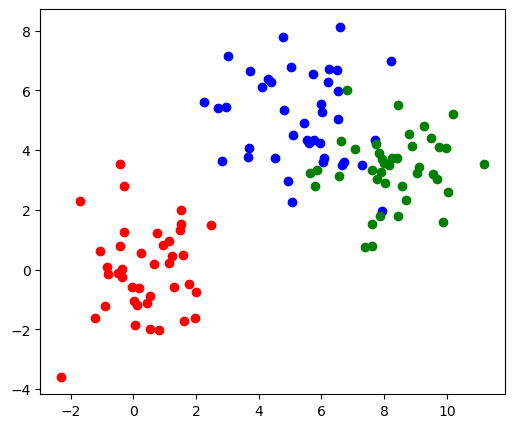

In [11]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [12]:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
# c_ translates slice objects to concatenation along the second axis.

In [13]:
Z=clf.predict(data) # returns the labels of the data
print (Z)

[0 0 0 ... 2 2 2]


### Question 4. 
How many “misclusterings” do we have?

**Answer**: from the figure below, we can see that we have 9 total misclusterings. 
* 5 green samples classified as blue
* 4 blue samples classified as green

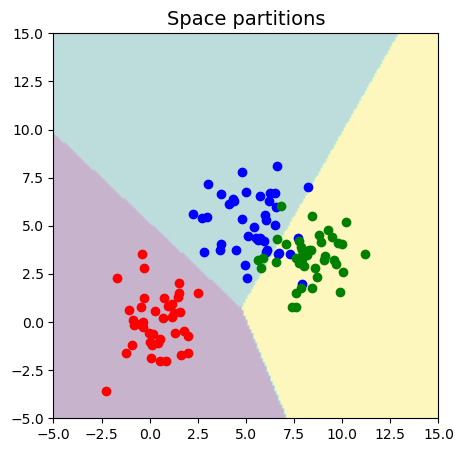

In [22]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower',
extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [23]:
clf = cluster.KMeans(n_clusters=K, random_state=0)
#initialize the k-means clustering
clf.fit(X) #run the k-means clustering

data=np.c_[XX.ravel(),YY.ravel()]
Z=clf.predict(data) # returns the clustering labels of the data

Visualising true labels by coloured points and space tessellation:

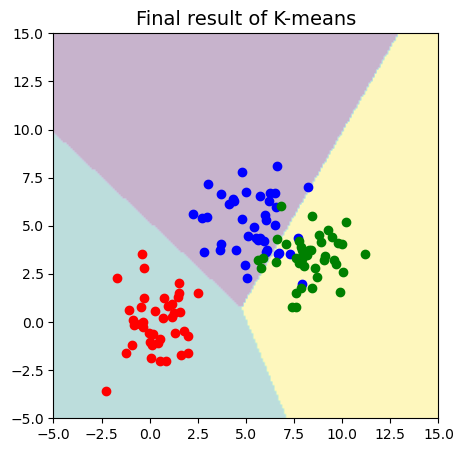

In [24]:
plt.title('Final result of K-means', size=14)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower',
extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((6,5))

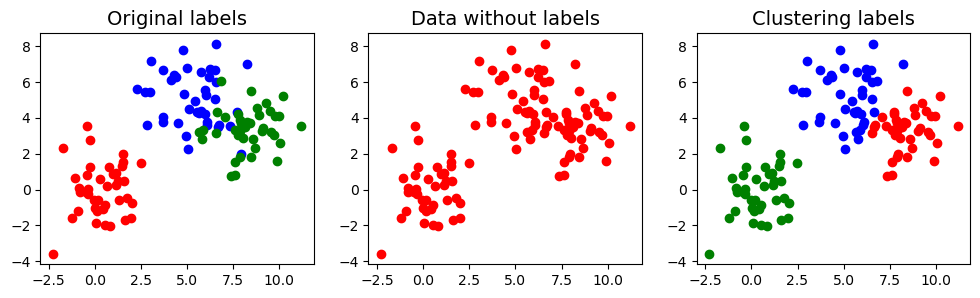

In [25]:
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
#initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g') # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r') # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((12,3))

The K-means algorithm clusters data by trying to separate samples in n groups of equal variance. In other words, the K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster. The means are commonly called the cluster “centroids”.

### Question 5. 
Shall the centroids belong to the original set of points?

**Answer**: The centroid can be an imaginary one. It is only a mathematical construct to achieve the main goal of an homogenous and complete clustering. 

The K-means algorithm aims to choose centroids minimising a
criterion known as the ***inertia*** or
***within-cluster*** sum-of-squares:

![K-means](http://vargas-solar.com/data-centric-smart-everything/wp-content/uploads/sites/42/2018/10/Capture-d’écran-2018-10-17-à-13.54.16.png)

Inertia or the within-cluster sum of squares criterion, can
be recognised as a measure of how internally coherent clusters
are. Several issues should be taken into account:

-   Inertia responds poorly to elongated clusters, or manifolds with
    irregular shapes.
-   Given enough time, K-means will always converge.
-   This algorithm requires the number of clusters to be specified.
-   It scales well to large number of samples and has been used across a
    large range of application areas in many different fields.

The computation is often done several times, with
different initializations of the *centroids*. One method to help address
this issue is the ***k-means++*** initialization scheme, which has been
implemented in scikit-learn (use the init=’kmeans++’ parameter). This
initialises the centroids to be (generally) distant from each other,
leading to provably better results than random initialisation. Some
seeds can result in poor convergence rate, or convergence to sub-optimal
clusterings:

##### Summary

-   (+) Select good seeds using a heuristic (e.g. seeds with
    large distance among them).
-   (+) Try out multiple starting points.
-   (+) Initialize with the results of another method.
-   (-) Tends to look for spherical clusters.
-   (-) Prone to local minima stabilization.

In [26]:
from sklearn import metrics

clf = cluster.KMeans(n_clusters=K, init='k-means++', random_state=0,
max_iter=300, n_init=10)
#initialize the k-means clustering
clf.fit(X) #run the k-means clustering

print ('Final evaluation of the clustering:')

print('Inertia: %.2f' % clf.inertia_)

print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(),
clf.labels_))

print('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(),
clf.labels_))

print('Completeness %.2f' % metrics.completeness_score(y.ravel(),
clf.labels_))

print('V_measure %.2f' % metrics.v_measure_score(y.ravel(), clf.labels_))

print('Silhouette %.2f' % metrics.silhouette_score(X, clf.labels_,
metric='euclidean'))

clf1 = cluster.KMeans(n_clusters=K, init='random', random_state=0,
max_iter=2, n_init=2)
#initialize the k-means clustering
clf1.fit(X) #run the k-means clustering

print ('Final evaluation of the clustering:')

print ('Inertia: %.2f' % clf1.inertia_)

print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(),
clf1.labels_))

print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(),
clf1.labels_))

print ('Completeness %.2f' % metrics.completeness_score(y.ravel(),
clf1.labels_))

print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(),
clf1.labels_))

print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_,
metric='euclidean'))

Final evaluation of the clustering:
Inertia: 373.74
Adjusted_rand_score 0.78
Homogeneity 0.77
Completeness 0.77
V_measure 0.77
Silhouette 0.52
Final evaluation of the clustering:
Inertia: 387.20
Adjusted_rand_score 0.80
Homogeneity 0.79
Completeness 0.79
V_measure 0.79
Silhouette 0.52


### 3. CASE STUDY: EUROSTAT data analysis

Eurostat is the home of the \`European Commission data

http://ec.europa.eu/eurostat

Eurostat’s main role is to process and publish comparable statistical
information at European level. Data in Eurostat is provided by each
member state. Eurostat’s re-use policy is free re-use of its data, both
for non-commercial and commercial purposes (with some minor exceptions).

#### Applying clustering to analyze countries according to their education resourses

In order to illustrate the clustering on a real dataset, we will
analyze the indicators on education finance data among the European
member states, provided by the Eurostat data bank2. The data is
organized by year (TIME): \[2002, 2003, 2004, 2005, 2006, 2007, 2008,
2009, 2010,  
2011\] and country (GEO): \[‘Albania’, ‘Austria’, ‘Belgium’,
‘Bulgaria’, ‘Croatia’, ‘Cyprus’, ‘Czech Republic’, ‘Denmark’, ‘Estonia’,
‘Euro area (13 countries)’, ‘Euro area (15 countries)’, ‘European Union
(25 countries)’, ‘European Union (27 countries)’, ‘Finland’,
‘Former Yugoslav Republic of Macedonia, the’, ‘France’, ‘Germany (until
1990 former territory of the FRG)’, ‘Greece’, ‘Hungary’,
‘Iceland’, ‘Ireland’, ‘Italy’, ‘Japan’, ‘Latvia’, ‘Liechtenstein’,
‘Lithuania’, ‘Luxembourg’, ‘Malta’, ‘Netherlands’, ‘Norway’, ‘Poland’,
‘Portugal’, ‘Romania’, ‘Slovakia’, ‘Slovenia’, ‘Spain’, ‘Sweden’,
‘Switzerland’, ‘Turkey’, ‘United Kingdom’, ‘United States’\]. Twelve
indicators (INDICED) on education finance with their values (Value) are
given like:-

1.  Expenditure on educational institutions from private sources as % of
    Gross Domestic Product (GDP), for all levels of education combined;
2.  Expenditure on educational institutions from public sources as % of
    GDP, for all levels of government combined,
3.  Expenditure on educational institutions from public sources as % of
    total public expenditure, for all levels of education combined,
4.  Public subsidies to the private sector as % of GDP, for all
    levels of education combined,
5.  Public subsidies to the private sector as % of total
    public expenditure, for all levels of education combined, etc. We
    can store in a table the 12 indicators for a given year (e.g. 2010).

Let us start having a look at the data.

In [27]:
#Read and check the dataset downloaded from the EuroStat

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import cluster

edu=pd.read_csv('./files/ch07/educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value
0,2002,European Union (27 countries),Total public expenditure on education as % of ...,5.10
1,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.14
2,2002,European Union (27 countries),Total public expenditure on education as % of ...,2.32
3,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.15
4,2002,European Union (27 countries),Total public expenditure on education as % of ...,0.50


In [28]:
edu.tail()

,TIME,GEO,INDIC_ED,Value
4915,2011,Japan,Total public expenditure on education as % of ...,NaN
4916,2011,Japan,Expenditure on educational institutions from p...,NaN
4917,2011,Japan,Public subsidies to the private sector as % of...,NaN
4918,2011,Japan,Expenditure on educational institutions from p...,1.56
4919,2011,Japan,Total public expenditure on education as % of ...,3.67


Data in CSV and databases are often organised in what is called stacked or record formats. In our case for each year (“TIME“) and country (“GEO“) of the EU as well as some reference countries such as Japan and United States, we have twelve indicators (“INDIC_ED“) on education finance with their values (“Value“). Let us reshape the table into a feature vector style data set.

To the process of reshaping stacked data into a table is sometimes called pivoting.

In [29]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED       Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                                        
2002 Austria                                                0.38                                                                
     Belgium                                                0.36                                                                
     Bulgaria                                               0.67                                                                
     Croatia                                                0.13                                                                
     Cyprus                                                 1.41                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined  \
TIME GEO                                                                                                                        
2002 Austria                                                5.30                                                                
     Belgium                                                5.80                                                                
     Bulgaria                                               3.75                                                                
     Croatia                                                3.71                                                                
     Cyprus                                                 5.87                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                                            
2002 Austria                                               10.46                                                                                    
     Belgium                                               11.65                                                                                    
     Bulgaria                                               9.49                                                                                    
     Croatia                                                 NaN                                                                                    
     Cyprus                                                14.67                                                                                    

INDIC_ED       Public subsidies to the private sector as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                  
2002 Austria                                                0.37                                          
     Belgium                                                0.29                                          
     Bulgaria                                               0.18                                          
     Croatia                                                 NaN                                          
     Cyprus                                                 0.73                                          

INDIC_ED       Public subsidies to the private sector as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                       
2002 Austria                                                0.74                                                               
     Belgium  

In [30]:
print ('Let us check the two indices:\n')
print ('\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist()))
print ('\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist()))

Let us check the two indices:


Primary index (TIME): 
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Observe that we have ten years information on these indicators, and as expected we have all members of the European Union with some aggregates and control/reference countries. For the sake of simplicity, let us focus on values on year 2010.

In [31]:
#Extract 2010 set of values
edu2010=pivedu.loc[2010]
edu2010.head()

INDIC_ED,"Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined","Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined","Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined","Public subsidies to the private sector as % of GDP, for all levels of education combined","Public subsidies to the private sector as % of total public expenditure, for all levels of education combined","Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level","Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)","Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)","Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)","Total public expenditure on education as % of GDP, for all levels of education combined","Total public expenditure on education as % of gross national income, for all levels of education combined","Total public expenditure on education as % of total public expenditure, for all levels of education combined"
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16


Let us clean and store the names of the features and the countries.

In [32]:
#Store column names and clear them for better handling. Do the same with countries
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
'Euro area (15 countries)': 'EU15',
'European Union (25 countries)': 'EU25',
'European Union (27 countries)': 'EU27',
'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
'Germany (until 1990 former territory of the FRG)': 'Germany'
})
features = edu2010.columns.tolist()

countries = edu2010.index.tolist()

edu2010.columns=range(12)
edu2010.head()

,0,1,2,3,4,5,6,7,8,9,10,11
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16


As we can observe, this is not a clean data set, there are missing values. Some countries may not collect or have access to some indicators and there are countries without any indicators. Let us display this effect.

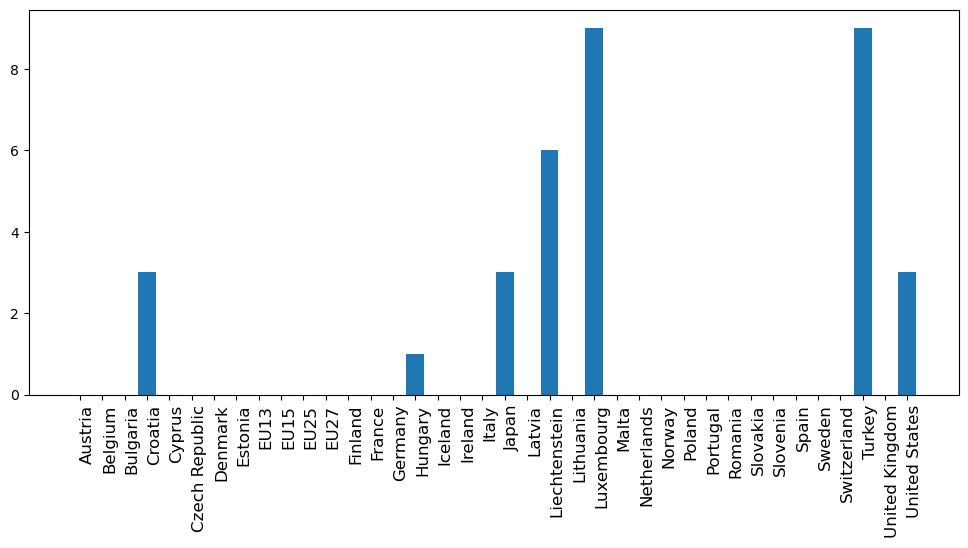

In [33]:
#Check what is going on in the NaN data
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='left',
fontsize=12)
fig = plt.gcf()
fig.set_size_inches((12,5))

We do not have info on Albania, Macedonia and Greece. And very limited info from Liechtenstein, Luxembourg and Turkey. So let us work without them. Now let us check the features.

[1 0 3 0 3 0 0 0 0 0 0 3]


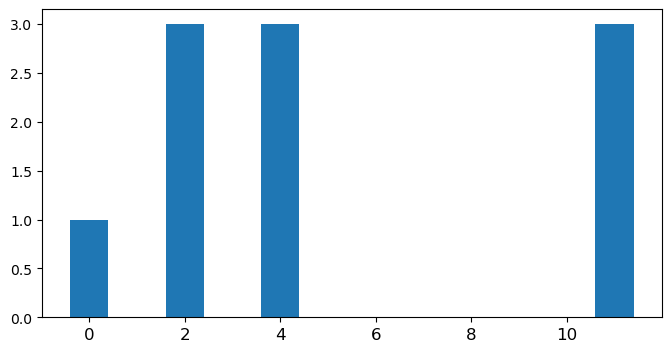

In [35]:
#Remove non info countries
wrk_countries = nan_countries<4

educlean=edu2010.loc[wrk_countries] #.ix - Construct an open mesh from multiple sequences.

#Let us check the features we have
na_features = np.sum(np.where(educlean.isnull(),1,0),axis=0)
print (na_features)

plt.bar(np.arange(na_features.shape[0]),na_features)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches((8,4))

There are four features with missing data. At this point we can
proceed in two ways:

-   Fill in the features with some non-informative, non-biasing data.
-   Drop the features with missing values.

If we have many features and only a few have missing values then it
is not much harmful to drop them. However, if missing values are
spread across the features, we have to eventually deal with them. In our
case, both options seem reasonable, so we will proceed with both at the
same time.

In [37]:
#Option A fills those features with some value, at risk of extracting wrong information
#Constant filling : edufill0=educlean.fillna(0)
edufill=educlean.fillna(educlean.mean())
print ('Filled in data shape: ' + str(edufill.shape))

#Option B drops those features
edudrop=educlean.dropna(axis=1)
#dropna: Return object with labels on given axis omitted where alternately any or
# all of the data are missing
print ('Drop data shape: ' + str(edudrop.shape))

Filled in data shape: (35, 12)
Drop data shape: (35, 8)


In the fill-in option, we have decided to fill the data with the mean value of the feature. This will not bias the distribution of the feature, though it has consequences in the interpretation of the results.

Let us now apply a K-means clustering technique on this data in order to partition the countries according to their investment in education and check their profiles.

In [38]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance

X_train_fill = edufill.values
X_train_fill = scaler.fit_transform(X_train_fill)

clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)

clf.fit(X_train_fill) #Compute k-means clustering.

y_pred_fill = clf.predict(X_train_fill)
#Predict the closest cluster each sample in X belongs to.

idx=y_pred_fill.argsort()

Let us visualise the result of the K-means clustering:

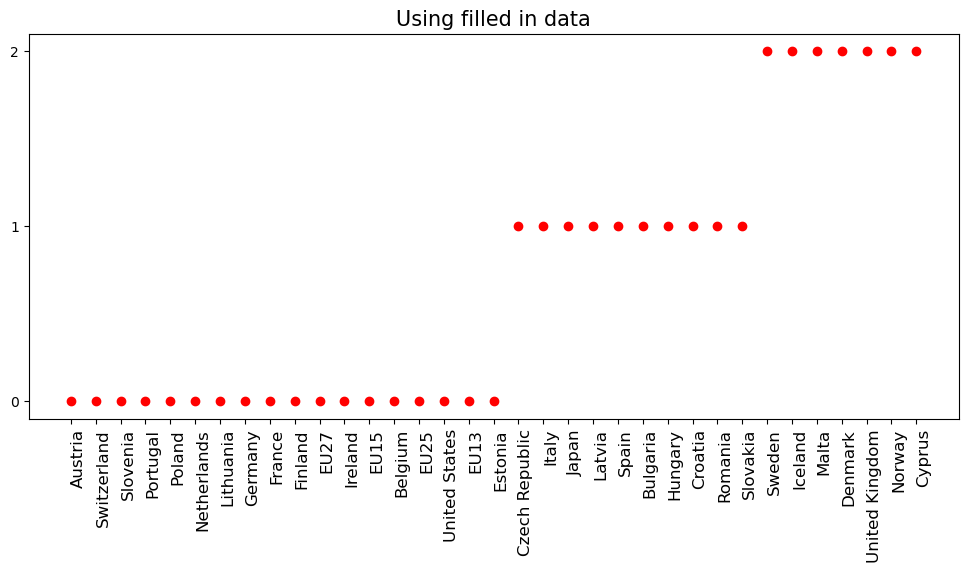

In [39]:
plt.plot(np.arange(35),y_pred_fill[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using filled in data', size=15)
plt.yticks([0,1,2])
fig = plt.gcf()

fig.set_size_inches((12,5))

Let us apply the clustering on the dataset with dropped missing values:

In [40]:
X_train_drop = edudrop.values
X_train_drop = scaler.fit_transform(X_train_drop)

clf.fit(X_train_drop) #Compute k-means clustering.
y_pred_drop = clf.predict(X_train_drop) #Predict the closest cluster of each sample in X.

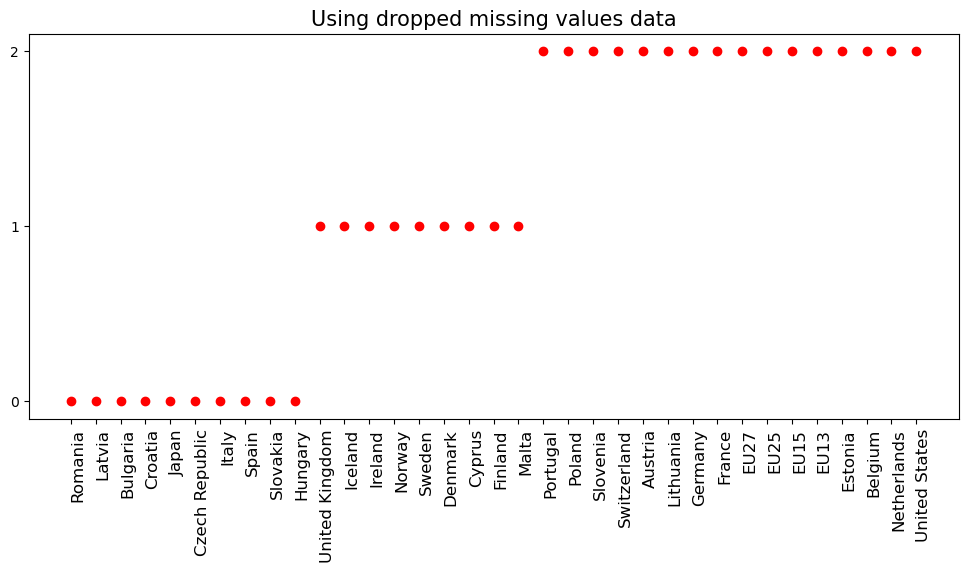

In [41]:
idx=y_pred_drop.argsort()
plt.plot(np.arange(35),y_pred_drop[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using dropped missing values data',size=15)
fig = plt.gcf()
plt.yticks([0,1,2])
fig.set_size_inches((12,5))

We have sorted the data for better visualization. At a simple glance we can see that both partitions can be different. We can better check this effect plotting the clusters values of one technique against the other.

([<matplotlib.axis.YTick at 0x2830dca2bb0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

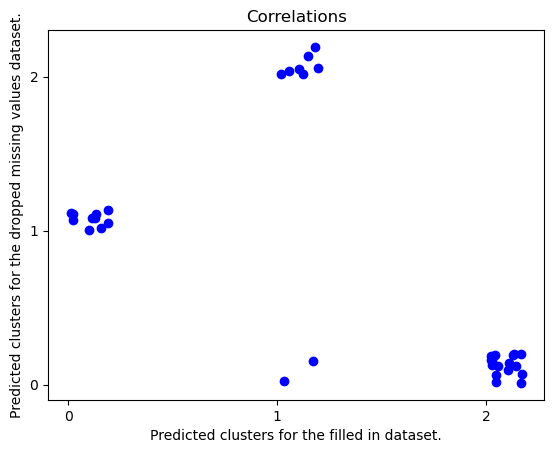

In [42]:
plt.plot(y_pred_drop+0.2*np.random.rand(35),y_pred_fill+0.2*np.random.rand(35),'bo')
plt.xlabel('Predicted clusters for the filled in dataset.')
plt.ylabel('Predicted clusters for the dropped missing values dataset.')
plt.title('Correlations')
plt.xticks([0,1,2])
plt.yticks([0,1,2])

Well, looking at both methods, both may yield the same results, but not necessarily always. This is mainly due to two aspects: the random initialisation of the k-means clustering and the fact that each method works in a different space (dropped data vs. filled-in data).

Let us check the list of countries in both methods. Note that we should not consider the cluster value, since it is irrelevant.

In [43]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill)
if item==0]))
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==0]))
print ('\n')
print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill)
if item==1]))
print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==1]))
print ('\n')
print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill)
if item==2]))
print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==2]))
print ('\n')

Cluster 0: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']
Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']


Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']
Cluster 1: 
['Cyprus', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']


Cluster 2: 
['Cyprus', 'Denmark', 'Iceland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']
Cluster 2: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']




Let us check the profile of the clusters by looking at the centroids:

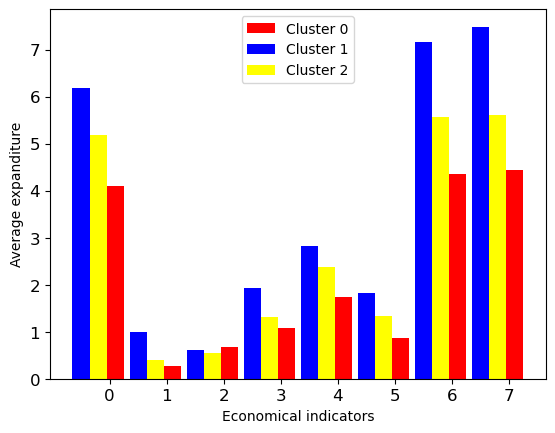

In [60]:
width=0.3
p1 = plt.bar(np.arange(8),np.squeeze(scaler.inverse_transform(clf.cluster_centers_[1].reshape(1,-1))),width,color='b')
# Scale back the data to the original representation
p2 = plt.bar(np.arange(8)+width,np.squeeze(scaler.inverse_transform(clf.cluster_centers_[2].reshape(1,-1))),
width,color='yellow')
p0 = plt.bar(np.arange(8)+2*width,np.squeeze(scaler.inverse_transform(clf.cluster_centers_[0].reshape(1,-1))),
width,color='r')

plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicators')
plt.ylabel('Average expanditure')
fig = plt.gcf()

It looks like cluster “1“ spends more on education while cluster “0“ is the one with less resources on education. What about Spain?

Let us refine a little bit more cluster “0“ and check how close are members from this cluster to cluster “1“. This may give us a hint on a possible ordering.

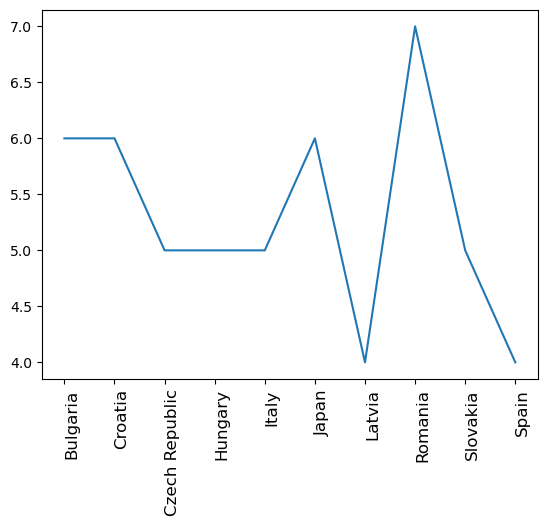

In [64]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')
#the distance of the elements of cluster 0 to the center of cluster 1

fx = np.vectorize(int)

plt.plot(np.arange(p.shape[0]), fx(p))

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
horizontalalignment='left',fontsize=12)
plt.show()

Well, it seems that Spain belongs to cluster “0“, it is the closest to change to a policy in the lines of the other clusters.

Additionally, we can also check the distance to the centroid of cluster “0“.

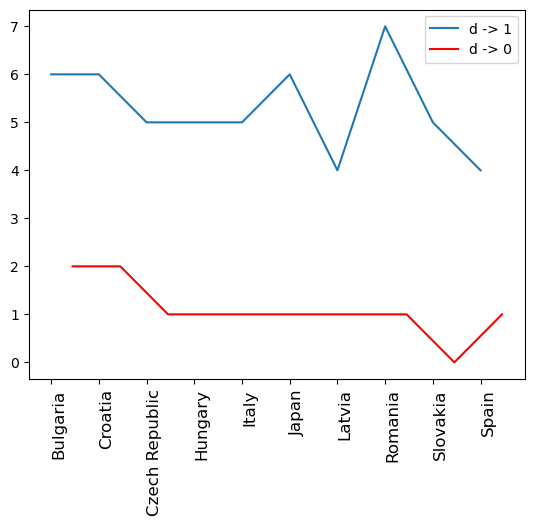

In [65]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')
pown = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')

width=0.45
p0=plt.plot(np.arange(p.shape[0]),fx(p),width)
p1=plt.plot(np.arange(p.shape[0])+width,fx(pown),width,color = 'red')

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
horizontalalignment='left',fontsize=12)
plt.legend( (p0[0], p1[0]), ('d -> 1', 'd -> 0') ,loc=1)

Let us redo the clustering with K=4 and see what we can conclude.

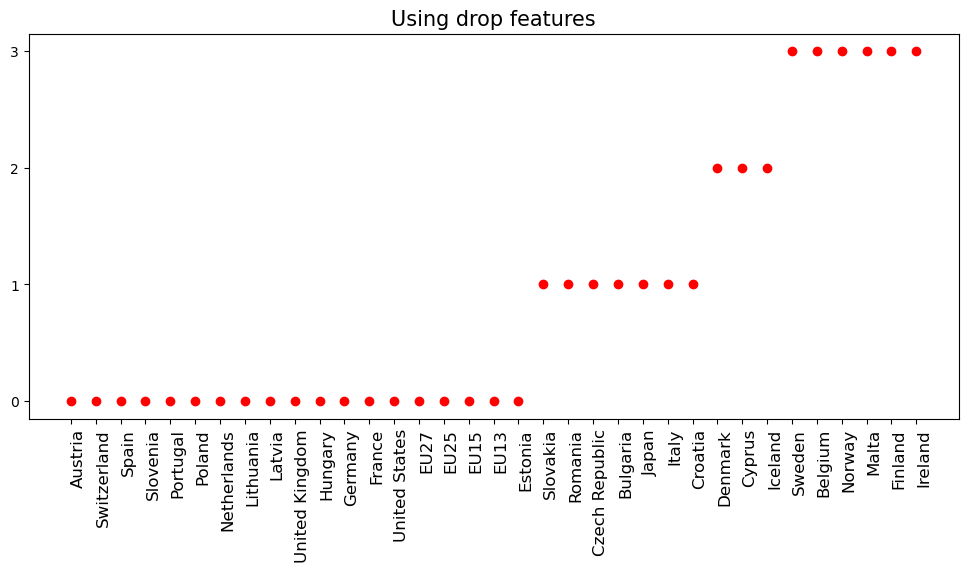

In [66]:
X_train = edudrop.values
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)

idx=y_pred.argsort()
plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,
horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
plt.yticks([0,1,2,3])
fig = plt.gcf()
fig.set_size_inches((12,5))

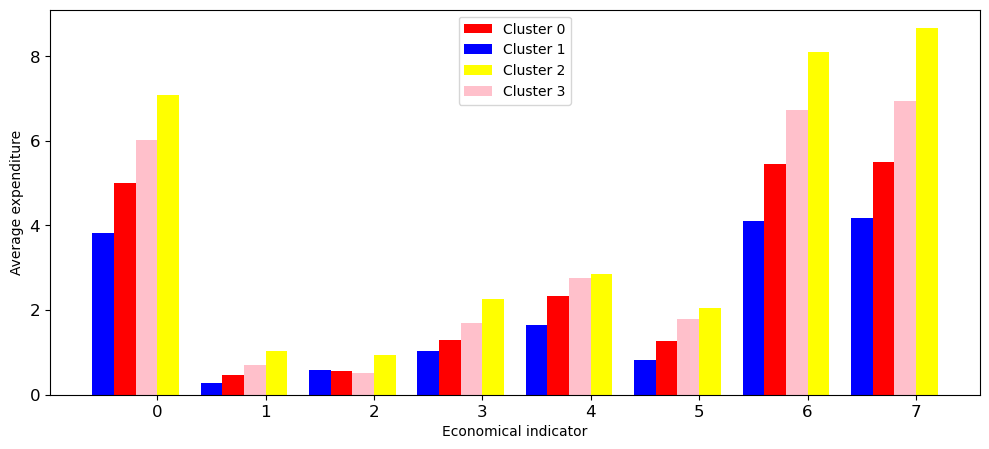

In [67]:
width=0.2
p0 = plt.bar(np.arange(8)+1*width,clf.cluster_centers_[0],width,color='r')
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
p2 = plt.bar(np.arange(8)+3*width,clf.cluster_centers_[2],width,color='yellow')
p3 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[3],width,color='pink')

plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2',
'Cluster 3') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicator')
plt.ylabel('Average expenditure')
fig = plt.gcf()
fig.set_size_inches((12,5))

Spain is still in cluster “0“. But as we observed in our previous clustering it was very close to changing cluster. This time cluster “0“ includes the averages values for the EU members. Just for the sake of completeness, let us write down the name of the countries in the clusters.

In [68]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==0]))

print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==1]))

print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==2]))

print ('Cluster 3: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==3]))

#Save data for future use.
import pickle
ofname = open('edu2010.pkl', 'wb')
s = pickle.dump([edu2010, wrk_countries_names,y_pred ],ofname)
ofname.close()

Cluster 0: 
['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']
Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
Cluster 2: 
['Cyprus', 'Denmark', 'Iceland']
Cluster 3: 
['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']


We can repeat the process using the alternative clustering techniques and compare their results. Let us first apply the spectral clustering. The corresponding code will be:

In [70]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances

X = StandardScaler().fit_transform(edudrop.values)

distances = euclidean_distances(edudrop.values)

spectral = cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors")
spectral.fit(edudrop.values)

y_pred = spectral.labels_.astype(int)

If we visualise the results:

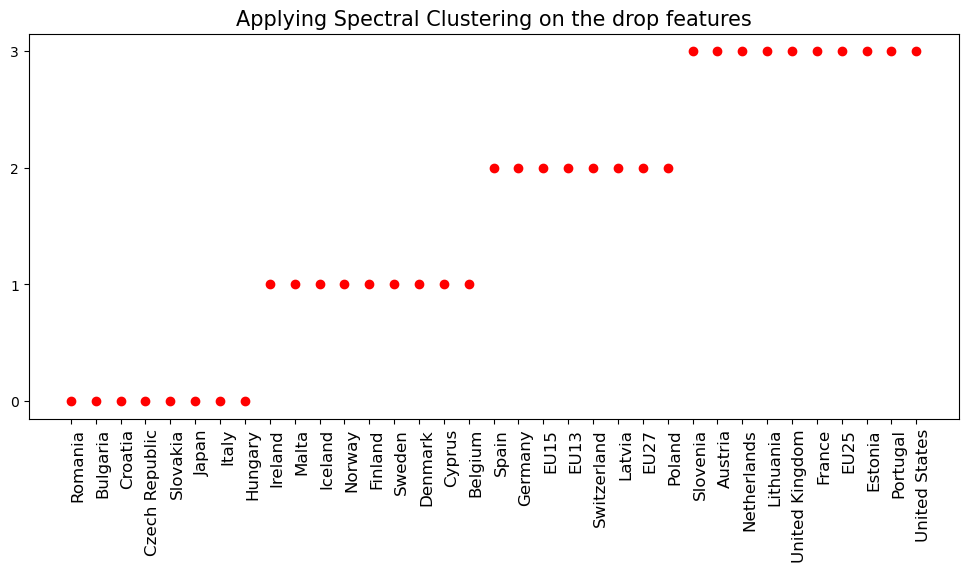

In [71]:
idx=y_pred.argsort()

plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i]
for i in idx],rotation=90,horizontalalignment='left',fontsize=12)

plt.yticks([0,1,2,3])

plt.title('Applying Spectral Clustering on the drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

Note that in general, the spectral clustering intends to obtain more balanced clusters. In this way, the predicted cluster 1 merges the cluster 2 and 3 of the K-means clustering, cluster 2 corresponds to the cluster 1 of the K-means clustering, cluster 0 mainly goes to cluster 2, and clusters 3 corresponds to cluster 0 of the K-means.

Applying the agglomerative clustering, we obtain not only the different clusters, but also we can see how different clusters are obtained. This, in some way it is giving us information on which are the pairs of countries and clusters that are most similar. The corresponding code that applies the agglomerative clustering is:

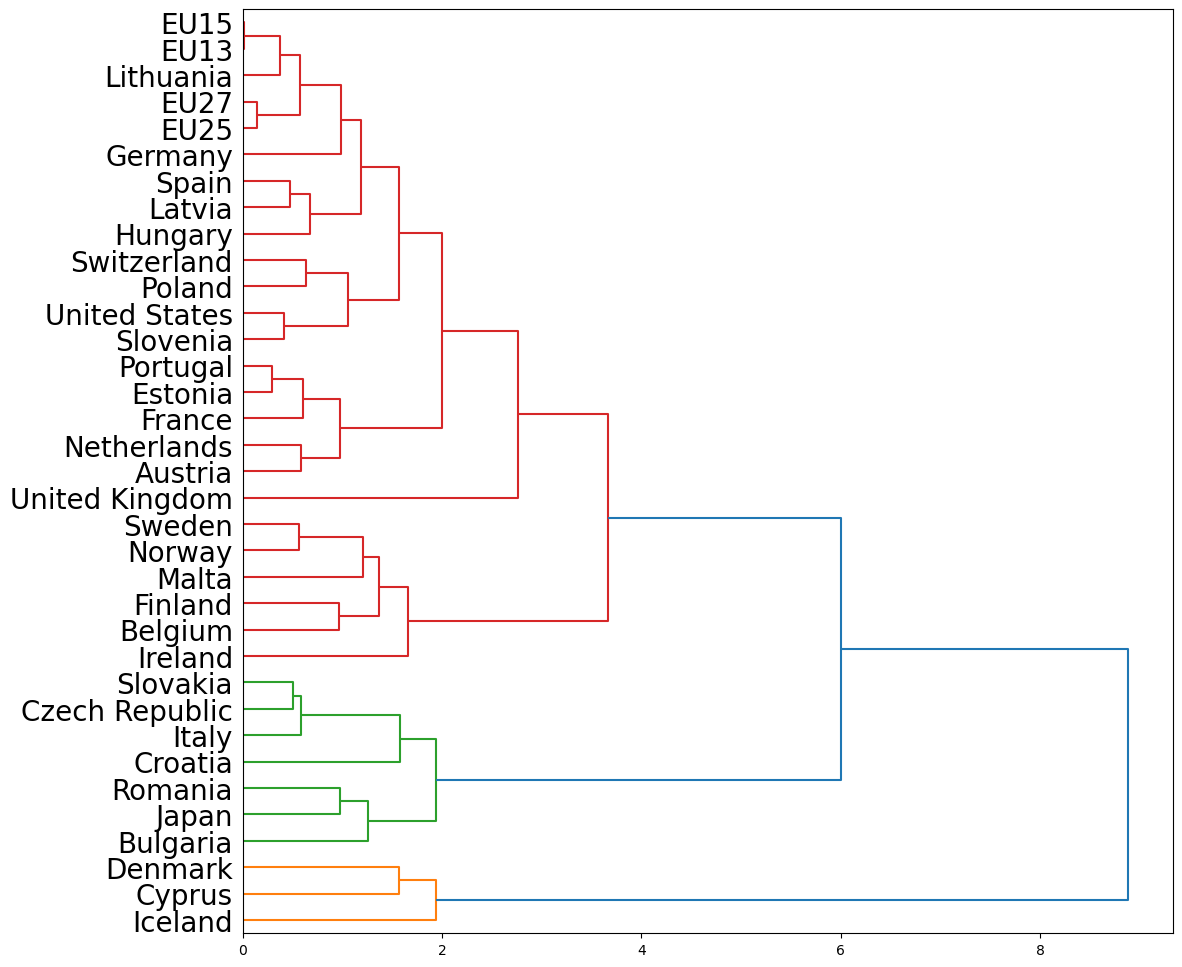

In [74]:
X_train = edudrop.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure() # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,labels = wrk_countries_names, leaf_font_size=20);

plt.show()

In scikit-learn, the parameter color_threshold colors all the descendent
links below a cluster node k the same color if k is the first node below
the color threshold. All links connecting nodes with distances greater
than or equal to the threshold are colored blue. Thus, if we use color
threshold = 3, the obtained clusters are as follows:

-   Cluster 0: \[‘Cyprus’, ‘Denmark’, ‘Iceland’\]
-   Cluster 1: \[‘Bulgaria’, ‘Croatia’, ‘Czech Republic’, ‘Italy’,  
    ‘Japan’, ‘Romania’, ‘Slovakia’\]
-   Cluster 2: \[‘Belgium’, ‘Finland’, ‘Ireland’, ‘Malta’, ‘Norway’,  
    ‘Sweden’\]
-   Cluster 3: \[‘Austria’, ‘Estonia’, ‘EU13’, ‘EU15’, ‘EU25’, ‘EU27’,  
    ‘France’, ‘Germany’, ‘Hungary’, ‘Latvia’, ‘Lithuania’,
    ‘Netherlands’,  
    ‘Poland’, ‘Portugal’, ‘Slovenia’, ‘Spain’, ‘Switzerland’, ‘United  
    Kingdom’, ‘United States’\]

Note that they correspond in high degree to the clusters obtained by
the K-means (except permutation of clusters labels that is irrelevant).
The figure shows the construction of the clusters using the complete
linkage agglomerative clustering. Different cuts at different levels of
the dendrogram allow to obtain different number of clusters. As a
summary, let us compare the results of the three approaches of
clustering. We cannot expect that the results coincide since different
approaches are based on different criteria to construct the clusters.
Still, we can observe that in this case K-means and the agglomerative
approaches gave the same results (up to a permutation of the number of
cluster that is irrelevant), meanwhile the spectral clustering gave more
evenly distributed clusters. It fused cluster 0 and 2 of the
agglomerative clustering in cluster 1, and split cluster 3 of
agglomerative clustering in clusters 0 and 3 of it. Note that these
results can change when using different distance between data.

## Follow up Questions

## Question 6. 
Draw the pipeline implemented by the exercise.

**Answers:** the methodology employed by the exercise is as shown below:

![Pipeline III](pipeline_III.png)